In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years, title, xlabel, ylabel, filename):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]

    
    plt.style.use('ggplot')
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.scatter(x, y)
        plt.plot(x, y)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig(filename, bbox_inches='tight')
    
def find_country_to_minimize_column(df, column_name):
    return df[df[column_name] == df[column_name].min()]["Country Name"]
def find_country_to_maximize_column(df, column_name):
    return df[df[column_name] == df[column_name].max()]["Country Name"]

def iterate_rows(df):
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        print(row)
        
def find_fastest_declining_region(df, first_year, second_year):
    lowestM = 10000000
    lowestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m < 0:
            if m < lowestM:
                lowestM = m
                lowestCountry = row["Country Name"]
            print("Declines: " + row["Country Name"] )
    return (lowestM, lowestCountry)
        
def find_fastest_growing_region(df, first_year, second_year):
    highestM = 0
    highestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m > 0:
            if m > highestM and row["Country Name"] != "World" and row["Country Name"] != "IDA & IBRD total" and row["Country Name"] != 'Low & middle income' and row["Country Name"] != 'Middle income' and row["Country Name"] != 'Early-demographic dividend' and row["Country Name"] != 'Lower middle income' and row["Country Name"] != 'IBRD only' and row["Country Name"] !='IDA total':
                highestM = m
                highestCountry = row["Country Name"]
            print("Inclines: " + row["Country Name"] )
    return (highestM, highestCountry)
    


In [34]:
df = read_and_preprocess("energy_use_data.csv", ["2015"], ["2012","2014"])
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
2,Angola,AGO,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,433.572531,458.794165,471.694177,491.978617,515.217119,520.962358,521.780681,552.363634,533.761010,544.609322
3,Albania,ALB,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,719.584378,706.859408,679.861765,710.748498,732.316682,729.154373,764.968617,687.896260,801.329975,808.455840
5,Arab World,ARB,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,1483.609005,1550.244389,1581.776568,1666.034418,1712.024615,1772.404084,1738.294881,1848.883591,1805.698754,1961.366530
6,United Arab Emirates,ARE,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,9698.287900,8716.289692,8127.945004,8367.151530,7572.354438,7215.218899,7190.970335,7481.193875,7604.839686,7648.399884
7,Argentina,ARG,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,1720.673713,1853.041666,1858.392218,1937.641467,1865.337264,1928.652357,1952.051053,1936.803540,1967.021678,2029.922825
8,Armenia,ARM,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,842.697522,864.883192,972.798367,1033.171827,903.700436,863.025963,944.040371,1029.943531,1000.958385,1015.909886
11,Australia,AUS,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,3063.554271,3115.787084,3172.974865,3284.050959,3349.414167,3463.215578,...,5564.087169,5709.344668,5868.347097,5964.665776,5862.551944,5793.116026,5745.232190,5575.287093,5468.391369,5334.681679
12,Austria,AUT,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,1546.261468,1554.034906,1675.873621,1823.995225,1855.085155,1851.843564,...,4085.567651,4078.812226,4019.590170,4032.148426,3798.151168,4051.196020,3921.900515,3886.767732,3919.044419,3763.327903
13,Azerbaijan,AZE,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,1599.960676,1559.568746,1411.557340,1520.313919,1334.166178,1279.552594,1369.350999,1472.897391,1474.003433,1502.078168
15,Belgium,BEL,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,2519.497320,2570.815623,2810.061148,3043.306993,3021.647212,3116.033563,...,5555.615784,5470.491824,5336.963212,5454.667159,5196.581983,5539.472223,5092.316147,4845.488295,4997.463306,4708.221218


In [35]:
find_country_to_minimize_column(df, "2014")

214    South Sudan
Name: Country Name, dtype: object

In [36]:
find_country_to_maximize_column(df, "2014")

198    Qatar
Name: Country Name, dtype: object

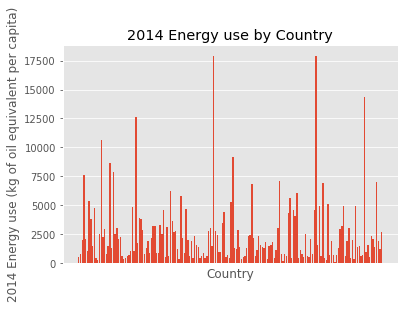

In [37]:
x = df["Country Name"]
y = df["2014"]
plt.bar(x, y)
plt.title("2014 Energy use by Country")
plt.ylabel("2014 Energy use (kg of oil equivalent per capita)")
plt.xlabel("Country")
plt.xticks([])
plt.savefig("all.png", bbox_inches='tight')

0


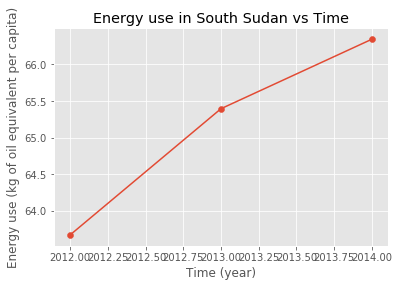

In [38]:
plot_country_data(df, "South Sudan", False, True, 2012, 2014, [], "Energy use in South Sudan vs Time", "Time (year)", "Energy use (kg of oil equivalent per capita)", "SouthSudan.png")


11


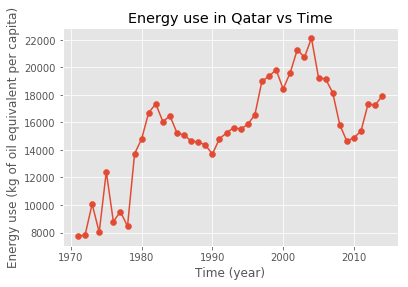

In [39]:
plot_country_data(df, "Qatar", False, True, 1960, 2014, [], "Energy use in Qatar vs Time", "Time (year)", "Energy use (kg of oil equivalent per capita)", "Qatar.png")


0


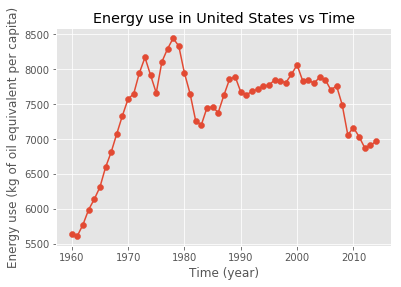

In [40]:
plot_country_data(df, "United States", False, True, 1960, 2014, [], "Energy use in United States vs Time", "Time (year)", "Energy use (kg of oil equivalent per capita)", "UnitedStates.png")


In [42]:
find_fastest_growing_region(df, "2012", "2014")

Inclines: Albania
Inclines: Arab World
Inclines: United Arab Emirates
Inclines: Argentina
Inclines: Azerbaijan
Inclines: Benin
Inclines: Bangladesh
Inclines: Bahrain
Inclines: Bosnia and Herzegovina
Inclines: Bolivia
Inclines: Brazil
Inclines: Botswana
Inclines: Canada
Inclines: China
Inclines: Cote d'Ivoire
Inclines: Cameroon
Inclines: Congo, Dem. Rep.
Inclines: Colombia
Inclines: Costa Rica
Inclines: Algeria
Inclines: East Asia & Pacific (excluding high income)
Inclines: Early-demographic dividend
Inclines: East Asia & Pacific
Inclines: Ecuador
Inclines: Estonia
Inclines: Ethiopia
Inclines: Gabon
Inclines: Georgia
Inclines: Ghana
Inclines: Gibraltar
Inclines: Guatemala
Inclines: Honduras
Inclines: IBRD only
Inclines: IDA & IBRD total
Inclines: Indonesia
Inclines: IDA only
Inclines: India
Inclines: Iran, Islamic Rep.
Inclines: Iceland
Inclines: Jamaica
Inclines: Kazakhstan
Inclines: Kenya
Inclines: Cambodia
Inclines: Korea, Rep.
Inclines: Libya
Inclines: Least developed countries: UN 

(468.47301881447174, 'Bahrain')

In [43]:
find_fastest_declining_region(df, "2012", "2014")

Declines: Angola
Declines: Armenia
Declines: Australia
Declines: Austria
Declines: Belgium
Declines: Bulgaria
Declines: Belarus
Declines: Brunei Darussalam
Declines: Central Europe and the Baltics
Declines: Switzerland
Declines: Chile
Declines: Congo, Rep.
Declines: Caribbean small states
Declines: Cuba
Declines: Curacao
Declines: Cyprus
Declines: Czech Republic
Declines: Germany
Declines: Denmark
Declines: Dominican Republic
Declines: Europe & Central Asia (excluding high income)
Declines: Europe & Central Asia
Declines: Egypt, Arab Rep.
Declines: Euro area
Declines: Spain
Declines: European Union
Declines: Fragile and conflict affected situations
Declines: Finland
Declines: France
Declines: United Kingdom
Declines: Greece
Declines: High income
Declines: Hong Kong SAR, China
Declines: Croatia
Declines: Haiti
Declines: Hungary
Declines: IDA total
Declines: IDA blend
Declines: Ireland
Declines: Iraq
Declines: Israel
Declines: Italy
Declines: Jordan
Declines: Japan
Declines: Kyrgyz Repub

(-963.5461154946157, 'Kuwait')

11


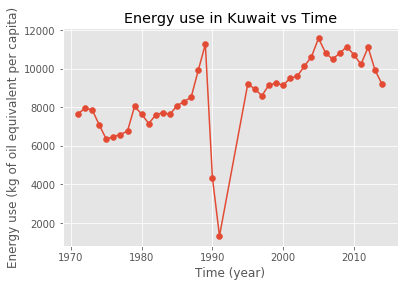

In [46]:
plot_country_data(df, "Kuwait", False, True, 1960, 2014, [1992, 1993, 1994], "Energy use in Kuwait vs Time", "Time (year)", "Energy use (kg of oil equivalent per capita)", "Kuwait.png")


11


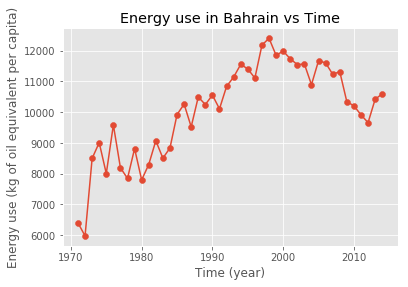

In [47]:
plot_country_data(df, "Bahrain", False, True, 1960, 2014, [], "Energy use in Bahrain vs Time", "Time (year)", "Energy use (kg of oil equivalent per capita)", "Bahrain.png")
